## *Import the Libraries*

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## *Get the data*

In [45]:
df=pd.read_excel(r'C:\Users\Hp\Desktop\Uni_HIWI\train_20C_60C_1.xlsx')

In [46]:
df.tail()

,Cycle,Time,Set Humidity,Set Temperature,Mess Humidity,Mess Temperature,Sample,Frequency,Capacitance,Resistance
1123,1,23:42:51,22,60,21.9,60.0,Sample 1,1000,8.966868e-11,7.707113e+06
1124,1,23:46:13,21,60,21.1,60.0,Sample 1,1000,8.837935e-11,8.446460e+06
1125,1,23:47:44,21,60,20.7,60.0,Sample 1,1000,8.771517e-11,8.887299e+06
1126,1,23:51:07,20,60,20.1,60.0,Sample 1,1000,8.677494e-11,9.599438e+06
1127,1,23:52:38,20,60,19.8,60.0,Sample 1,1000,8.627908e-11,1.001937e+07


Text(0.5, 1.0, 'Humidity Vs Capacitance')

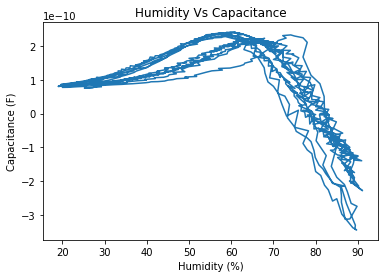

In [47]:
plt.plot(df['Mess Humidity'],df['Capacitance'])
plt.xlabel('Humidity (%)')
plt.ylabel('Capacitance (F)')
plt.title('Humidity Vs Capacitance')

Text(0.5, 1.0, 'Humidity Vs Resistance')

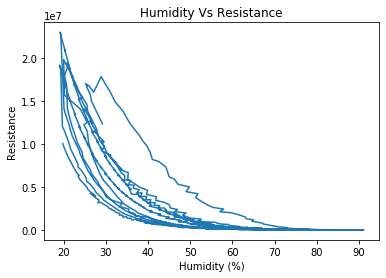

In [48]:
plt.plot(df['Mess Humidity'],df['Resistance'])
plt.xlabel('Humidity (%)')
plt.ylabel('Resistance')
plt.title('Humidity Vs Resistance')

In [6]:
X=df[['Capacitance','Resistance']]

In [7]:
y=df['Mess Humidity']

## *Train-Test Split*

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## *Feature Scaling*

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## *ANN*

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import RMSprop

In [11]:
model=Sequential()

model.add(Dense(2,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='RMSprop',loss='mse')


#### *Early Stopping*

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=X_train, y=y_train, epochs=1500,validation_data=(X_test, y_test), verbose=1,callbacks=[early_stop])

Epoch 1/1500
25/25 [==============================] - 2s 17ms/step - loss: 3422.9331 - val_loss: 3254.8845
Epoch 2/1500
25/25 [==============================] - 0s 2ms/step - loss: 3398.1448 - val_loss: 3231.6545
Epoch 3/1500
25/25 [==============================] - 0s 1ms/step - loss: 3373.3513 - val_loss: 3206.7166
Epoch 4/1500
25/25 [==============================] - 0s 2ms/step - loss: 3346.6182 - val_loss: 3179.9619
Epoch 5/1500
25/25 [==============================] - 0s 2ms/step - loss: 3317.6692 - val_loss: 3150.4893
Epoch 6/1500
25/25 [==============================] - 0s 1ms/step - loss: 3285.2056 - val_loss: 3116.5723
Epoch 7/1500
25/25 [==============================] - 0s 2ms/step - loss: 3249.0061 - val_loss: 3080.7446
Epoch 8/1500
25/25 [==============================] - 0s 2ms/step - loss: 3210.8608 - val_loss: 3042.7466
Epoch 9/1500
25/25 [==============================] - 0s 1ms/step - loss: 3170.2249 - val_loss: 3002.2405
Epoch 10/1500
25/25 [========================

25/25 [==============================] - 0s 2ms/step - loss: 275.3167 - val_loss: 268.6599
Epoch 156/1500
25/25 [==============================] - 0s 1ms/step - loss: 272.8250 - val_loss: 265.9900
Epoch 157/1500
25/25 [==============================] - 0s 1ms/step - loss: 270.6503 - val_loss: 263.9577
Epoch 158/1500
25/25 [==============================] - 0s 1ms/step - loss: 268.2178 - val_loss: 261.3943
Epoch 159/1500
25/25 [==============================] - 0s 1ms/step - loss: 265.9553 - val_loss: 258.9652
Epoch 160/1500
25/25 [==============================] - 0s 1ms/step - loss: 263.6858 - val_loss: 256.7521
Epoch 161/1500
25/25 [==============================] - 0s 1ms/step - loss: 261.3210 - val_loss: 254.2405
Epoch 162/1500
25/25 [==============================] - 0s 1ms/step - loss: 258.9232 - val_loss: 251.9233
Epoch 163/1500
25/25 [==============================] - 0s 1ms/step - loss: 256.7156 - val_loss: 249.6647
Epoch 164/1500
25/25 [==============================] - 0s 1m

Epoch 311/1500
25/25 [==============================] - 0s 1ms/step - loss: 47.1003 - val_loss: 52.2427
Epoch 312/1500
25/25 [==============================] - 0s 1ms/step - loss: 47.1004 - val_loss: 52.1952
Epoch 313/1500
25/25 [==============================] - 0s 1ms/step - loss: 46.9489 - val_loss: 52.1498
Epoch 314/1500
25/25 [==============================] - 0s 1ms/step - loss: 46.8969 - val_loss: 52.1100
Epoch 315/1500
25/25 [==============================] - 0s 1ms/step - loss: 46.7702 - val_loss: 52.1729
Epoch 316/1500
25/25 [==============================] - 0s 2ms/step - loss: 46.7680 - val_loss: 52.0523
Epoch 317/1500
25/25 [==============================] - 0s 1ms/step - loss: 46.6419 - val_loss: 51.9585
Epoch 318/1500
25/25 [==============================] - 0s 1ms/step - loss: 46.5799 - val_loss: 51.9481
Epoch 319/1500
25/25 [==============================] - 0s 1ms/step - loss: 46.4618 - val_loss: 51.8851
Epoch 320/1500
25/25 [==============================] - 0s 1ms/s

Epoch 390/1500
25/25 [==============================] - 0s 1ms/step - loss: 43.5641 - val_loss: 49.7527
Epoch 391/1500
25/25 [==============================] - 0s 1ms/step - loss: 43.5371 - val_loss: 49.7142
Epoch 392/1500
25/25 [==============================] - 0s 1ms/step - loss: 43.5456 - val_loss: 49.6848
Epoch 393/1500
25/25 [==============================] - 0s 2ms/step - loss: 43.4534 - val_loss: 49.6558
Epoch 394/1500
25/25 [==============================] - 0s 2ms/step - loss: 43.4928 - val_loss: 49.6407
Epoch 395/1500
25/25 [==============================] - 0s 2ms/step - loss: 43.4246 - val_loss: 49.6186
Epoch 396/1500
25/25 [==============================] - 0s 2ms/step - loss: 43.3286 - val_loss: 49.7023
Epoch 397/1500
25/25 [==============================] - 0s 2ms/step - loss: 43.4113 - val_loss: 49.5848
Epoch 398/1500
25/25 [==============================] - 0s 1ms/step - loss: 43.3450 - val_loss: 49.5686
Epoch 399/1500
25/25 [==============================] - 0s 1ms/s

Epoch 469/1500
25/25 [==============================] - 0s 1ms/step - loss: 42.4295 - val_loss: 48.9532
Epoch 470/1500
25/25 [==============================] - 0s 1ms/step - loss: 42.3875 - val_loss: 48.9515
Epoch 471/1500
25/25 [==============================] - 0s 1ms/step - loss: 42.4236 - val_loss: 48.9164
Epoch 472/1500
25/25 [==============================] - 0s 2ms/step - loss: 42.4879 - val_loss: 48.9303
Epoch 473/1500
25/25 [==============================] - 0s 1ms/step - loss: 42.3472 - val_loss: 48.9595
Epoch 474/1500
25/25 [==============================] - 0s 1ms/step - loss: 42.4751 - val_loss: 48.8917
Epoch 475/1500
25/25 [==============================] - 0s 2ms/step - loss: 42.3528 - val_loss: 48.8895
Epoch 476/1500
25/25 [==============================] - 0s 1ms/step - loss: 42.3853 - val_loss: 48.9947
Epoch 477/1500
25/25 [==============================] - 0s 1ms/step - loss: 42.4051 - val_loss: 48.8696
Epoch 478/1500
25/25 [==============================] - 0s 1ms/s

Epoch 548/1500
25/25 [==============================] - 0s 1ms/step - loss: 41.8851 - val_loss: 48.5373
Epoch 549/1500
25/25 [==============================] - 0s 1ms/step - loss: 41.8788 - val_loss: 48.5365
Epoch 550/1500
25/25 [==============================] - 0s 2ms/step - loss: 41.7771 - val_loss: 48.7361
Epoch 551/1500
25/25 [==============================] - 0s 1ms/step - loss: 41.9455 - val_loss: 48.5685
Epoch 552/1500
25/25 [==============================] - 0s 1ms/step - loss: 41.8848 - val_loss: 48.5420
Epoch 553/1500
25/25 [==============================] - 0s 1ms/step - loss: 41.8824 - val_loss: 48.5431
Epoch 554/1500
25/25 [==============================] - 0s 2ms/step - loss: 41.8104 - val_loss: 48.5437
Epoch 555/1500
25/25 [==============================] - 0s 1ms/step - loss: 41.8421 - val_loss: 48.5487
Epoch 556/1500
25/25 [==============================] - 0s 1ms/step - loss: 41.8535 - val_loss: 48.5469
Epoch 557/1500
25/25 [==============================] - 0s 1ms/s

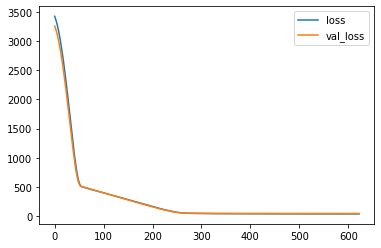

In [13]:
#model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=1500)
losses = pd.DataFrame(model.history.history)
losses.plot()

In [14]:
predictions = model.predict(X_test)

## *Results*


In [15]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score

In [16]:
mean_absolute_error(y_test,predictions)

5.345108167260094

In [17]:
np.sqrt(mean_squared_error(y_test,predictions))

6.9709758264540245

In [18]:
explained_variance_score(y_test,predictions)

0.8851270252654518

In [19]:
Accuracy=r2_score(y_test,predictions)*100
Accuracy

88.50736822521253

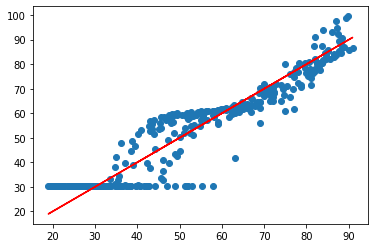

In [20]:
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

## *Prediction on new data set*

In [21]:
df_test=pd.read_excel(r'C:\Users\Hp\Desktop\Uni_HIWI\test_Data_set.xlsx')

In [22]:
new=df_test[['Capacitance','Resistance']]

In [23]:
new_y=df_test['Mess Humidity']

In [24]:
new.head()

,Capacitance,Resistance
0,1.208549e-10,1.619814e+06
1,8.509170e-11,7.173240e+06
2,8.063773e-11,9.489483e+06
3,1.909948e-10,8.593723e+04
4,1.535618e-10,5.946870e+05


In [25]:
new_y.head()

0    49.1
1    30.0
2    29.0
3    71.0
4    50.2
Name: Mess Humidity, dtype: float64

In [26]:
new = scaler.transform(new.values.reshape(-1, 2))

In [27]:
Predicted_Humidity=model.predict(new)

In [28]:
df_test.iloc[7]

Cycle                         1
Time                   23:22:27
Set Humidity                 90
Set Temperature              25
Mess Humidity              89.4
Mess Temperature           25.6
Sample                 Sample 1
Frequency                  1000
Capacitance        -8.42814e-11
Resistance              14157.9
Name: 7, dtype: object

In [29]:
Predicted_Humidity[7]

array([83.085884], dtype=float32)

Text(0, 0.5, 'Predicted_Humidity(%)')

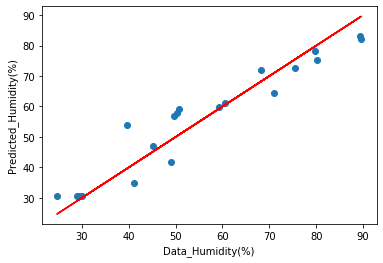

In [30]:
plt.scatter(new_y,Predicted_Humidity)

# Perfect predictions
plt.plot(new_y,new_y,'r')
plt.xlabel('Data_Humidity(%)')
plt.ylabel('Predicted_Humidity(%)')
#plt.plot(Predicted_Humidity,df_test['Capacitance'])
#plt.xlabel('Predicted_Humidity(%)')
#plt.ylabel('Capacitance (F)')
#plt.title('Humidity Vs Capacitance')

In [31]:
Accuracy=r2_score(new_y,Predicted_Humidity)*100
Accuracy

91.12011722840899

In [32]:
new_2=df[['Capacitance','Resistance']]

In [33]:
new_y_2=df['Mess Humidity']

In [34]:
new_2.head()

,Capacitance,Resistance
0,7.919044e-11,12309162.10
1,7.684840e-11,14951852.53
2,7.630858e-11,15745106.97
3,7.566102e-11,16676931.84
4,7.593036e-11,16820332.46


In [35]:
new_y_2.head()

0    29.2
1    26.6
2    26.3
3    25.4
4    25.5
Name: Mess Humidity, dtype: float64

In [36]:
new_2= scaler.transform(new_2.values.reshape(-1, 2))

In [37]:
Predicted_Humidity_2=model.predict(new_2)

In [38]:
df.iloc[863]

Cycle                         1
Time                   10:58:34
Set Humidity                 28
Set Temperature              60
Mess Humidity              27.7
Mess Temperature           60.2
Sample                 Sample 1
Frequency                  1000
Capacitance         8.90109e-11
Resistance          8.09148e+06
Name: 863, dtype: object

In [39]:
Predicted_Humidity_2[22]

array([30.518263], dtype=float32)